<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_8/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roll Number = 191EE123 <br> 
Name:  Harshavardhan D


In [1]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})
!pip install control

import control


     |████████████████████████████████| 339 kB 5.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=686fc4aa0e20601ace30764bbe38b0901262581276ef8008ed8375cc8c5a79ea
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


# **Problem** **1**. <br>
Part 1: <br>

Transfer function of H1(z)$ for Ro =  0.8 
   z
-------
z - 0.8

Transfer function of H1(z)$ for Ro =  1 
  z
-----
z - 1

Transfer function of H1(z)$ for Ro =  1.2 
   z
-------
z - 1.2

Transfer function of H1(z)$ for Ro =  2 
  z
-----
z - 2



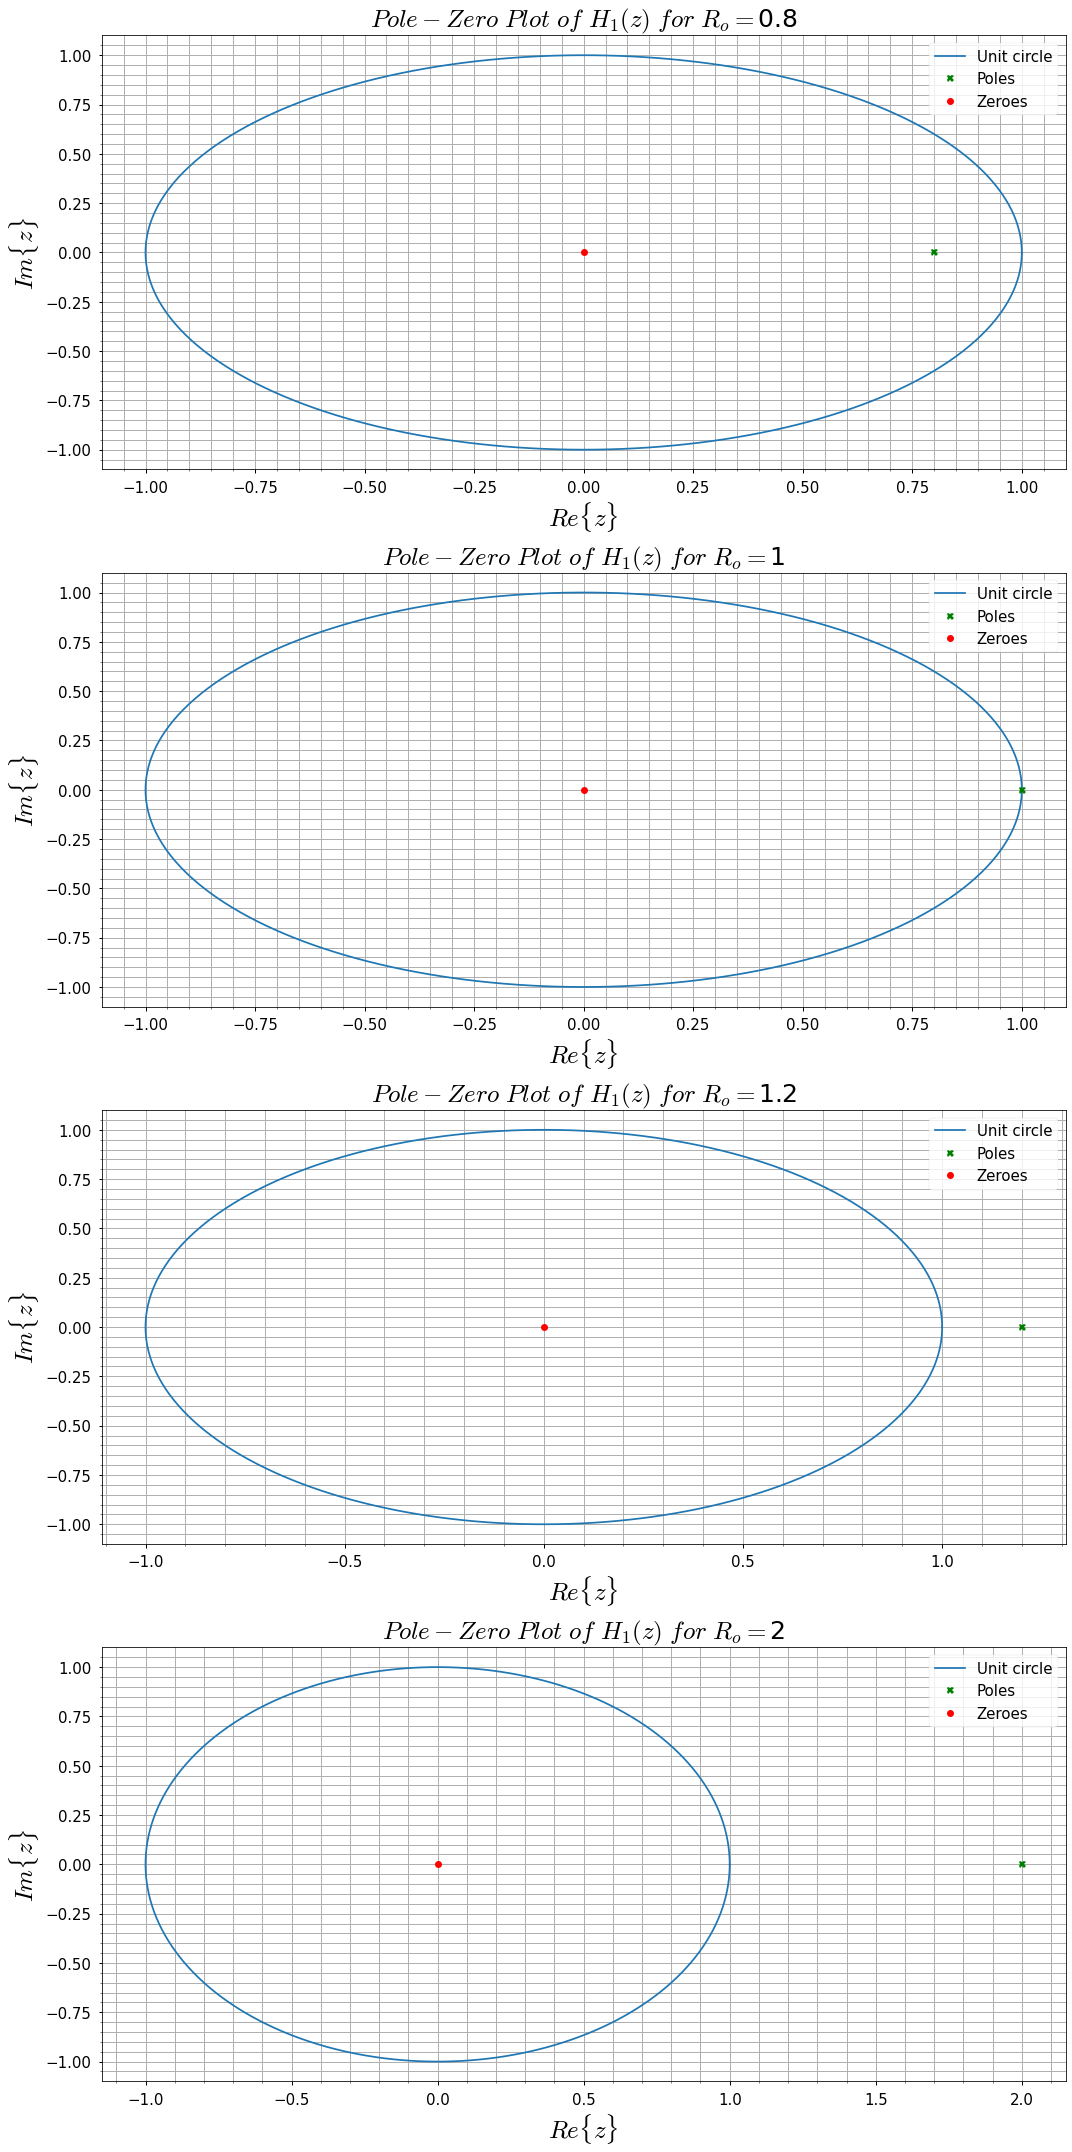

In [9]:
Ro=[0.8, 1, 1.2, 2]
b=[]
a=[]
fig1, axs = plt.subplots(len(Ro), figsize=(15,30))
def plot_signal(p, z, xaxis_label=None, yaxis_label=None, row=None):
    axs[row].plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs[row].plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs[row].plot(np.real(z), np.imag(z), 'ro', label='Zeroes')  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    axs[row].set_title(r'$Pole-Zero\ Plot\ of\ H_{1}(z)\ for\ R_{o} = $' + str(Ro[i]), fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    axs[row].legend(loc = 'upper right', fontsize = 15)
    fig1.tight_layout()

for i in range(len(Ro)):
    b.append(np.array([1, 0]))
    a.append(np.array([1, -Ro[i]]))
    z, p, k=sp.tf2zpk(b[i], a[i])
    theta=np.arange(0, 2*np.pi, 0.01)
    print(r'Transfer function of H1(z)$ for Ro = ',Ro[i], control.TransferFunction(b[i], a[i], dt=True))
    plot_signal(p, z, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=i)


fig1.savefig('fig1.png')

Part 2:

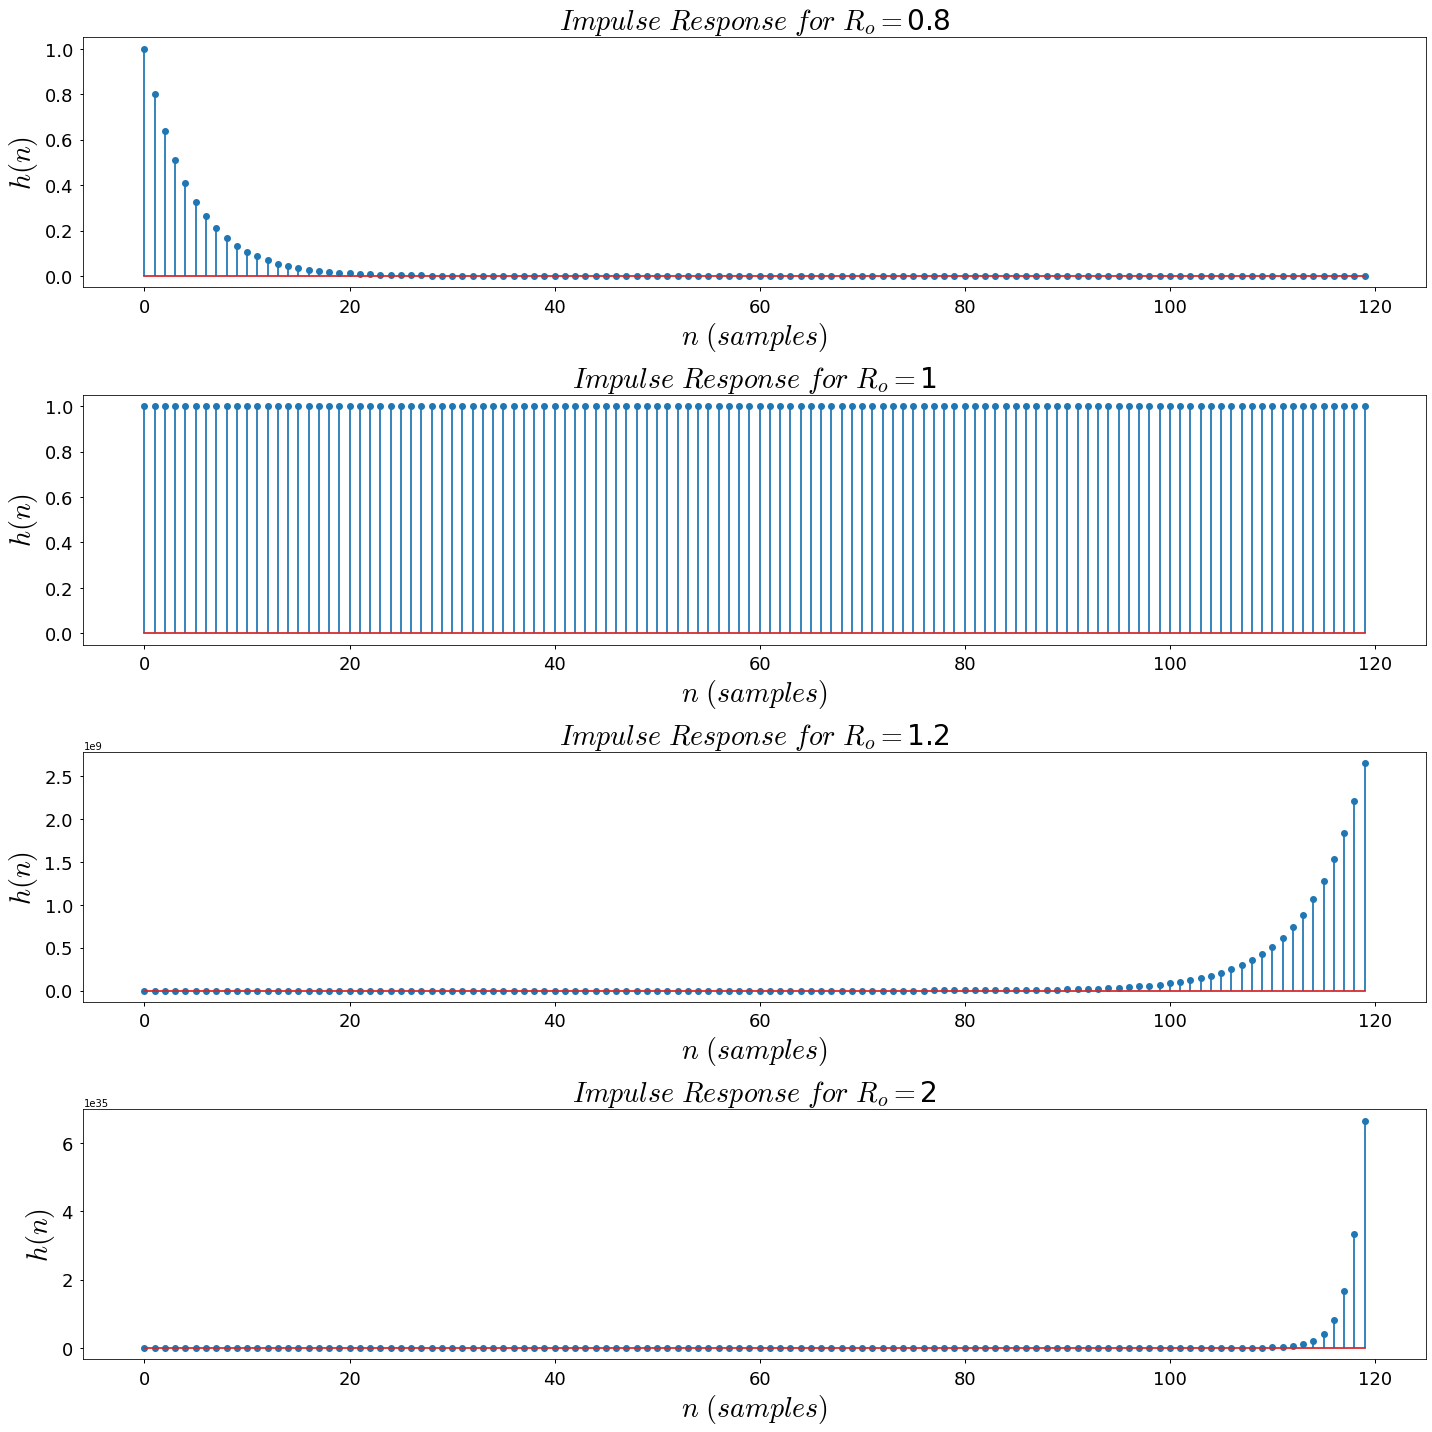

In [14]:
n=np.arange(120)
x=np.zeros(120)
x[0]=1
y=[]
fig2, axs = plt.subplots(len(Ro), figsize=(20,20))
def plot_s(n, y,xaxis_label=None, yaxis_label=None, title=None, row=None):
    axs[row].stem(n, y, use_line_collection=True)
    axs[row].set_title(title, fontsize = 28)
    axs[row].set_xlabel(xaxis_label, fontsize = 28)
    axs[row].set_ylabel(yaxis_label, fontsize = 28)
    axs[row].tick_params(axis="both", labelsize = 18)
    fig2.tight_layout()  

for i in range(len(Ro)):
    y.append(sp.lfilter(b[i], a[i], x))
    plot_s(n, y[i], title=r'$Impulse\ Response\ for\ R_{o} = $'+str(Ro[i]), xaxis_label=r'$n\ (samples)$', yaxis_label=r'$h(n)$', row=i)
fig2.savefig('fig2.png')

Part 3:

Number of days taken to reach 1 million infections with Ro = 2.5 is:  16


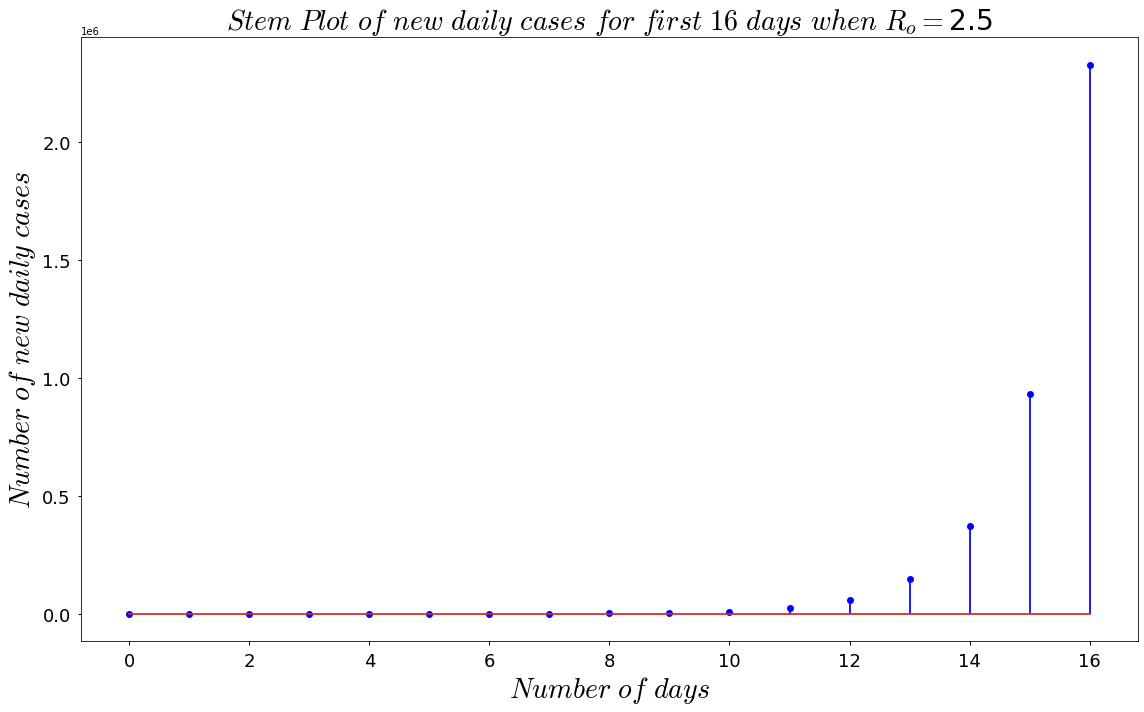

In [30]:
x=np.zeros(120)
x[0]=1
R=2.5
b=np.array([1, 0])
a=np.array([1, -R])
y=sp.lfilter(b, a, x)
plt.rcParams['figure.figsize'] = [16,10]
def plot_s1(x, y, label=None, title=None, xaxis_label=None, yaxis_label=None, save=None, legend=None, color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x, y, use_line_collection=True, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xaxis_label, fontsize = 28)
 plt.ylabel(yaxis_label, fontsize = 28)
 plt.title(title, fontsize = 28)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18) 
 if legend:
        plt.legend()
 plt.tight_layout()


for i in range(len(y)):
    if y[i]>=1e6:
        break
print(r'Number of days taken to reach 1 million infections with Ro = 2.5 is: ', i)
n=np.arange(i+1)
plot_s1(n, y[0:i+1], title=r'$Stem\ Plot\ of\ new\ daily\ cases\ for\ first\ '+str(i)+'\ days\ when\ R_{o} = $' + str(R), xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ new\ daily\ cases$')
plt.savefig('fig3.png')

Part 4:

Part 5:

 the transfer function of integrator filter is 
  z
-----
z - 1

The total number of infections after 20 days =  60632979


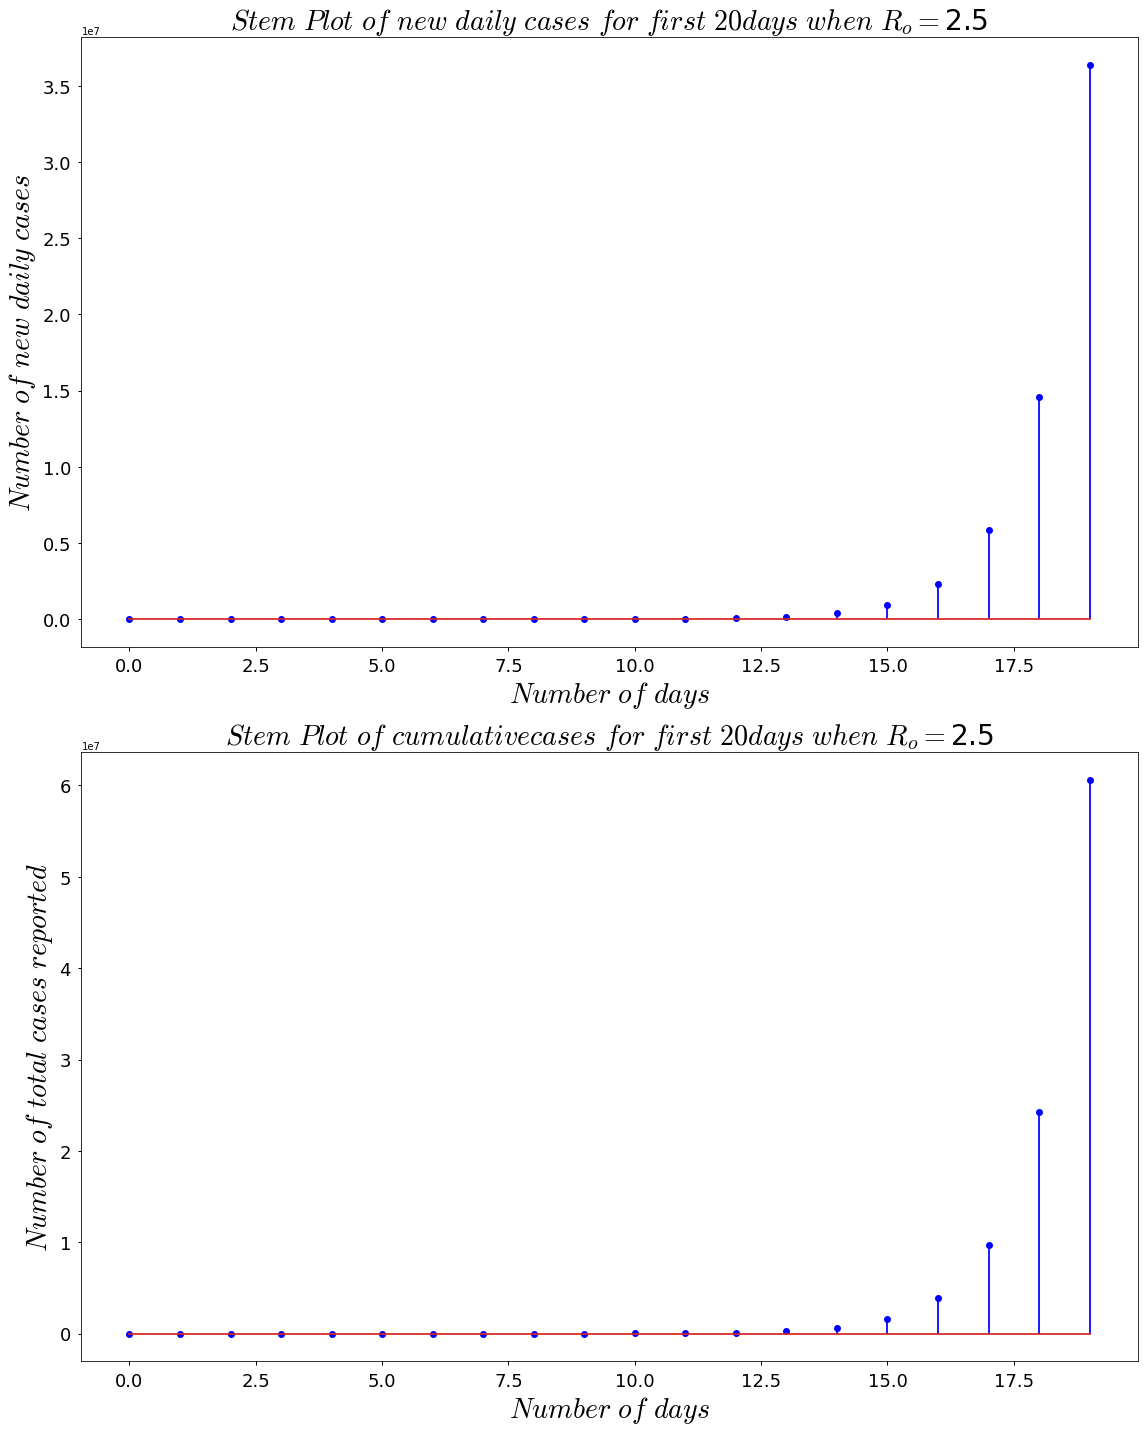

In [31]:
def plot_s2(x, y, label=None, title=None, xaxis_label=None, yaxis_label=None, save=None, legend=None, color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x, y, use_line_collection=True, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xaxis_label, fontsize = 28)
 plt.ylabel(yaxis_label, fontsize = 28)
 plt.title(title, fontsize = 28)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18) 
 if legend:
        plt.legend()
 plt.tight_layout()

bi=np.array([1, 0])
ai=np.array([1, -1])
print(r' the transfer function of integrator filter is', control.TransferFunction(bi, ai, dt=True))
x1=np.zeros(20)
x1[0]=1
n=np.arange(20)
plt.rcParams['figure.figsize'] = [16, 20]
r=2.5
b=np.array([1, 0])
a=np.array([1, -r])
y1=sp.lfilter(b, a, x1)

plt.subplot(211)
plot_s2(n, y1, title=r'$Stem\ Plot\ of\ new\ daily\ cases\ for\ first\ 20 days\ when\ R_{o} = $' + str(r), xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ new\ daily\ cases$')

plt.subplot(212)
yc=sp.lfilter(bi, ai, y1)
plot_s2(n, yc, title=r'$Stem\ Plot\ of\ cumulative cases\ for\ first\ 20 days\ when\ R_{o} = $' + str(r), xaxis_label=r'$Number\ of\ days$', yaxis_label=r'$Number\ of\ total\ cases\ reported$')

print('The total number of infections after 20 days = ', int(yc[-1])) #Rounded to the nearest integer

plt.savefig('fig5.png')